# CIFAR-10 Image Classification with Convolutional Neural Networks

My name is **Nikos**, and this project along with others in this folder mark a significant milestone in my journey to becoming an AI Engineer. I’m passionate about artificial intelligence and machine learning, and this project serves as the first step in that path. Through it, I aim to not only understand how neural networks work but also demonstrate the practical applications of AI in real-world problems.

In this project, we will use a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes, such as airplanes, cars, birds, cats, and more.

This project will guide you through the process of:
- Loading and preprocessing the dataset.
- Building a CNN model to classify the images.
- Training the model and evaluating its performance.
- Making real-time predictions.

Let's start by loading the dataset and preparing the data.


Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Number of classes: 10


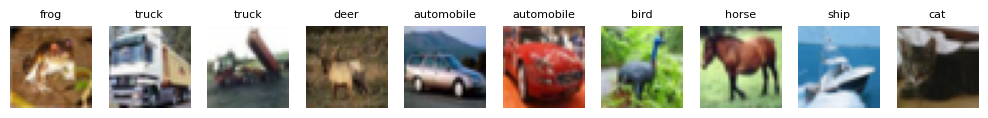

In [48]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Explore the dataset
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

# Display a 10x10 grid of sample images with their labels
plt.figure(figsize=(10, 10))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Loop to plot 100 images
for i in range(10):
    plt.subplot(10, 10, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]], fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


### Data Overview
The CIFAR-10 dataset consists of 60,000 images divided into 10 classes. Each image is a 32x32 color image. In this step, we load the dataset and display a 10x10 grid of the images to get a feel for the data.


In [49]:
# Normalize pixel values (from 0-255 to 0-1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of test labels: {y_test.shape}")


Shape of training labels: (50000, 10)
Shape of test labels: (10000, 10)


### Preprocessing
In this step, we normalize the pixel values of the images from the range [0, 255] to [0, 1]. This ensures that the neural network processes the images efficiently. Additionally, we convert the labels into one-hot encoding, which is necessary for training a classification model.


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential()

# Add convolutional layers and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a flattening layer
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

### CNN Architecture
In this step, we build a Convolutional Neural Network (CNN) model. The model has several convolutional layers followed by pooling layers to extract features from the images. After flattening the output from the convolutional layers, we add fully connected layers to classify the images into one of the 10 classes.


In [51]:
# Set the number of epochs and batch size
epochs = 10
batch_size = 64

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2633 - loss: 1.9522 - val_accuracy: 0.4914 - val_loss: 1.3917
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4843 - loss: 1.4271 - val_accuracy: 0.5678 - val_loss: 1.2074
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5573 - loss: 1.2502 - val_accuracy: 0.6056 - val_loss: 1.1114
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5999 - loss: 1.1370 - val_accuracy: 0.6357 - val_loss: 1.0421
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6321 - loss: 1.0455 - val_accuracy: 0.6358 - val_loss: 1.0292
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6533 - loss: 0.9853 - val_accuracy: 0.6652 - val_loss: 0.9450
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6836 - loss: 0.9145 - val_accuracy: 0.6884 - val_loss: 0.8923
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6954 - loss: 0.8734 - val_accuracy: 0.

### Training the CNN Model
We train the CNN model using 10 epochs and a batch size of 64. The training process will evaluate the model's performance on the test data after each epoch.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7138 - loss: 0.8159
Test Accuracy: 71.52%


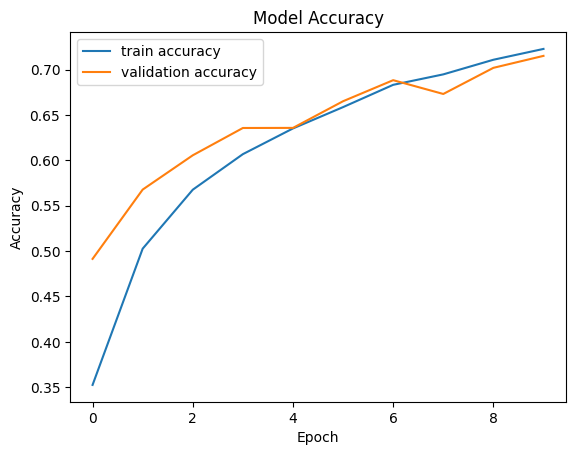

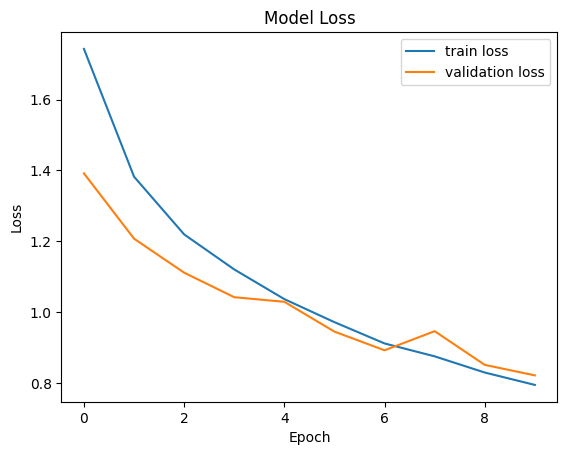

In [52]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Model Evaluation
After training, we evaluate the model on the test data to see how well it generalizes. We also plot the accuracy and loss curves over the training process to analyze the model's performance.


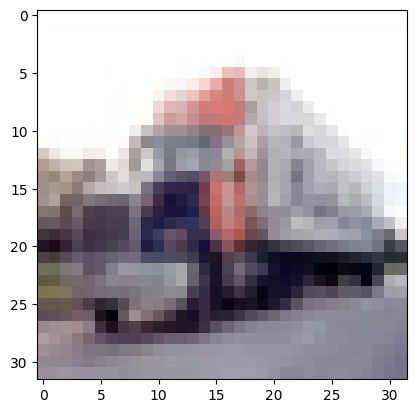

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Class: truck


In [53]:
# Test the model with a sample image from the test set
import random

# Select a random test image
idx = random.randint(0, X_test.shape[0])
sample_image = X_test[idx]
plt.imshow(sample_image)
plt.show()

# Predict the class of the sample image
predicted_class = model.predict(np.expand_dims(sample_image, axis=0)).argmax()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f"Predicted Class: {class_names[predicted_class]}")


### Real-time Prediction
Here, we test the model with a random image from the test set. We display the image and predict its class using the trained CNN model.
